In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("dark_background")

# plot colors female & male
color_f = 'hotpink'
color_m = 'royalblue'

### input for individual results

In [2]:
number = 1171
age    = 35     # age groups: U18, U20, U23, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80
gender = 'M'    # M or F

### read data

In [3]:
df = pd.read_csv('output.csv', index_col=0)

df['time'] = pd.to_timedelta(df['time'])
df['time_min'] = df['time'].dt.total_seconds()/60

df

,number,age,sex,time,time_min
place,,,,,
1,11,NaN,M,0 days 01:00:50,60.833333
2,4,NaN,M,0 days 01:01:22,61.366667
3,2,23.0,M,0 days 01:01:24,61.400000
4,9,NaN,M,0 days 01:02:15,62.250000
5,5,30.0,M,0 days 01:02:19,62.316667
...,...,...,...,...,...
7322,8579,NaN,W,0 days 03:13:59,193.983333
7323,4191,NaN,M,0 days 03:16:56,196.933333
7324,2492,60.0,M,0 days 03:18:03,198.050000


### overall stats

In [ ]:
N_total = len(df['number'].unique())
print(f'{N_total} finishers')

N_male = df[df['sex'] == 'M'].shape[0]
print(f'{round(N_male/N_total*100)} % male')

hours,    remainder = divmod(df['time_min'].median(), 60)
minutes,  remainder = divmod(remainder, 1)
seconds = remainder * 60
print(f"median time: {int(hours)} hour, {int(minutes)} minutes, {int(seconds)} seconds")

7319 finishers
60 % male
median time: 1 hour, 57 minutes, 57 seconds


### finish time distribution

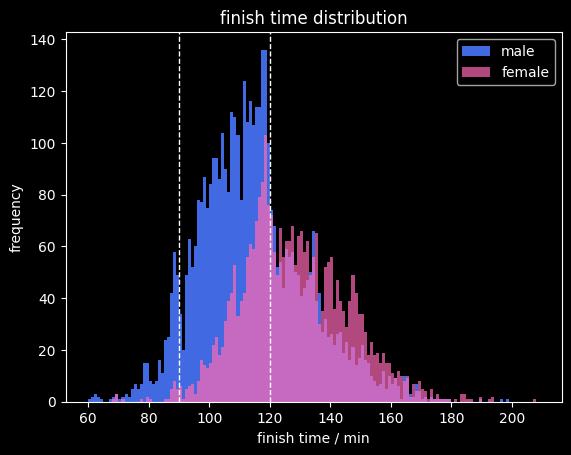

In [5]:
plt.hist(df.loc[df['sex'] == 'M' , 'time_min'], bins=range(60, 210, 1), color=color_m, label='male')
plt.hist(df.loc[df['sex'] == 'W' , 'time_min'], bins=range(60, 210, 1), color=color_f, label='female', alpha=0.7)

# plt.axvline(df.loc[df['number'] == number, 'time_min'].iloc[0], color='r', linestyle='dashed', linewidth=1, label=number)   # individual time
plt.axvline(60 + 30,   color='w', linestyle='dashed', linewidth=1)
plt.axvline(2*60,      color='w', linestyle='dashed', linewidth=1)
# plt.axvline(df['time_min'].median(), color='w', linestyle='dashed', linewidth=1, label='median')

plt.title('finish time distribution')
plt.xlabel('finish time / min')
plt.ylabel('frequency')
plt.legend()

# plt.savefig('finish_time_distribution.png', dpi=300, transparent=True)

### age distribution

In [6]:
df_age_male   = df[df['sex'] == 'M'].groupby('age').agg({'time_min': 'median', 'number' : 'count'})
df_age_female = df[df['sex'] == 'W'].groupby('age').agg({'time_min': 'median', 'number' : 'count'})

df_age = pd.merge(df_age_male, df_age_female, on='age', suffixes=['_m','_f'], how='outer').reset_index()

df_age['female_percentage'] = round(df_age['number_f'] / (df_age['number_m'] + df_age['number_f']) * 100 , 1)

N_age = df_age['number_m'].sum() + df_age['number_f'].sum()
print(f'{round(N_age/N_total*100)} % finishers with age group')

df_age

72 % finishers with age group


,age,time_min_m,number_m,time_min_f,number_f,female_percentage
0,18.0,115.516667,33,124.608333,12.0,26.7
1,20.0,106.033333,49,122.691667,30.0,38.0
2,23.0,108.316667,175,127.350000,197.0,53.0
3,30.0,112.308333,874,123.700000,553.0,38.8
4,35.0,111.458333,612,125.766667,309.0,33.6
5,40.0,110.433333,431,126.633333,247.0,36.4
6,45.0,113.500000,327,129.050000,208.0,38.9
7,50.0,114.933333,311,129.533333,139.0,30.9
8,55.0,118.600000,281,136.833333,125.0,30.8
9,60.0,121.633333,169,132.983333,61.0,26.5


The bars are plotted individually because the age groups have different sizes and are mixed below, at or above the specified value.  
Furthermore, the frequencies are scaled to a group size of 5 years.

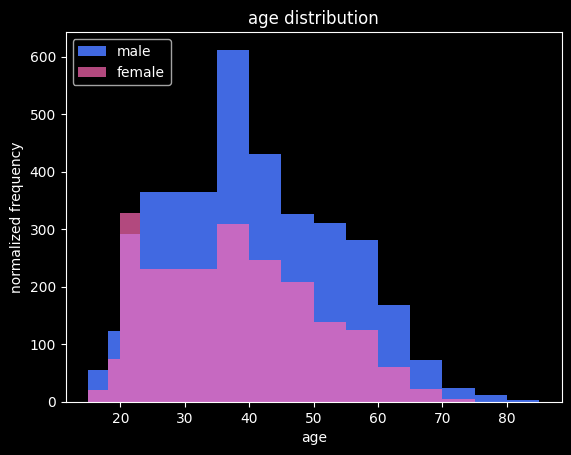

In [7]:
plt.bar(18, df_age['number_m'].iloc[0]*5/3, color=color_m, align='edge', width=-3, label='male')
plt.bar(18, df_age['number_f'].iloc[0]*5/3, color=color_f, align='edge', width=-3, label='female', alpha=0.7)

plt.bar(20, df_age['number_m'].iloc[1]*5/2, color=color_m, align='edge', width=-2)
plt.bar(20, df_age['number_f'].iloc[1]*5/2, color=color_f, align='edge', width=-2, alpha=0.7)

plt.bar(23, df_age['number_m'].iloc[2]*5/3, color=color_m, align='edge', width=-3)
plt.bar(23, df_age['number_f'].iloc[2]*5/3, color=color_f, align='edge', width=-3, alpha=0.7)

plt.bar(35, df_age['number_m'].iloc[3]*5/12, color=color_m, align='edge', width=-12)
plt.bar(35, df_age['number_f'].iloc[3]*5/12, color=color_f, align='edge', width=-12, alpha=0.7)

plt.bar(df_age['age'].iloc[4:], df_age['number_m'].iloc[4:], color=color_m, align='edge', width=5)
plt.bar(df_age['age'].iloc[4:], df_age['number_f'].iloc[4:], color=color_f, align='edge', width=5, alpha=0.7)

plt.xlabel('age')
plt.ylabel('normalized frequency')
plt.title('age distribution')
plt.legend()

# plt.savefig('age_distribution.png', dpi=300, transparent=True)

### median finish time by age

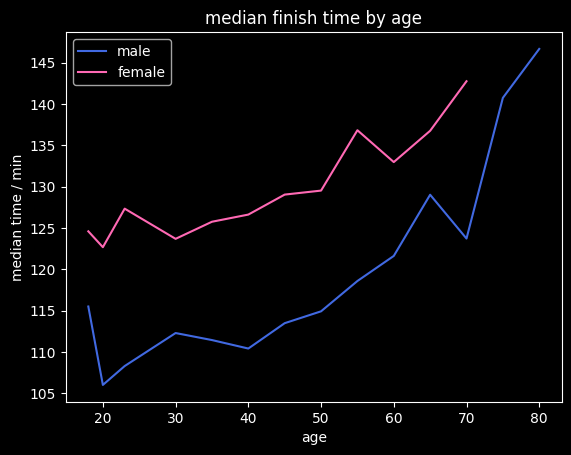

In [8]:
df_age.plot(x='age', y=['time_min_m','time_min_f'], color=[color_m, color_f], label=['male','female'])
plt.ylabel('median time / min')
plt.title('median finish time by age')
plt.legend()

# plt.savefig('finish_time_age.png', dpi=300, transparent=True)

### individual results

In [11]:
df_gender = df[df['sex'] == gender]
df_gender.reset_index(drop=True, inplace=True)

position_gender = df_gender[df_gender['number'] == number].index[0] + 1

print(f'{position_gender}. of {N_male} finishers in gender group ({position_gender/N_male*100:.1f} %)')

2254. of 4382 finishers in gender group (51.4 %)


In [12]:
df_gender_age = df_gender[df_gender['age'] == age]
df_gender_age.reset_index(drop=True, inplace=True)

N_gender_age = df_gender_age.shape[0]

position_gender_age = df_gender_age[df_gender_age['number'] == number].index[0] + 1

print(f'{position_gender_age}. of {N_gender_age} finishers in gender & age group ({position_gender_age/N_gender_age*100:.1f} %)')

342. of 612 finishers in gender & age group (55.9 %)
